In [1]:
# Initialize Otter 
import otter
grader = otter.Notebook("group_activity7.ipynb")

# In-class coding exercise #7
Objective: In this exercise you will practice using advanced pandas functions, such as`groupby()`, `resample()`, and `rolling`.

## Introduction to group coding exercises
Today you’ll work on this exercise in new groups of 3-4, submitting a single notebook file at the end of the class period. Decide amongst yourselves which member will upload the completed notebook to Gradescope this week. Make sure that everyone takes a turn being the “Uploader”. _You cannot upload the final code two weeks in a row._

Designate a different group member to be the "Reporter". The Reporter will be in charge of participating in the group discussion at the end of the class session.

### Workflow
Each question will be timed to ensure that everyone gets to work on at least a part of every question. Group activities are not graded by completeness or correctness, but by effort. We will be breaking down each question in the following order:  
1. Independent work 
2. Group work and discussion on coding question
3. Group work and discussion on reflection questions

You are welcome and encouraged to communicate with other groups and the teaching team when you feel stuck on a problem. 

As a reminder, we will be grading based best practices in coding. These include: 
1) Variables are used to store objects

2) Code is commented adequately

3) Variables are names appropriately

4) Code is efficient with minimal unnecessary lines 

5) Documenting help from outside sources, such as from other groups or online documentation. 

6) Final notebook fully runs from start to finish. A good way to check this is restarting the kernel and fully running through all the cells to check for any errors.

### Storing your answers
In the code cells where you will write your answers, there will be comments denoting:

"**# your code**"

and 

"**# answer variables**"

You may store any intermediary variables in the **your code** section. If you do not have any intermediary, you can also store your answer directly in the answer variables.

### Required Plot Elements for Figures
This assignments requires you to create and design figures using `matplotlib`. To practice good plotting practices, each figure will require the following to receive full points:
1) Concise, descriptive title for each figure/subplot
2) Axis labels with units (when possible)
3) Appropriate axis limits (minimum and maximum)
4) Appropriate tick resolution
5) Legend when using different datasets 
6) Appropriate font size (a good range is 12-15)

## Note here **and in the Gradescope submission** each of your group members:
1. Sry
2. Aaron
3. Quyen

# Q1: Primary Productivity from Station ALOHA

Today, we will be analyzing primary production data from Station ALOHA. 

"Station ALOHA is the focal point of a range of oceanographic studies conducted over great temporal scale that intend to understand and explain the trends of the greater North Pacific Ocean." [Source](https://aco-ssds.soest.hawaii.edu/ALOHA/)

Primary production is the measurement of carbon accumulated by photosynthesis. This term represents how much carbon is stored by unit volume and is calculated via the 14C-assimilation method. [Reference](https://hahana.soest.hawaii.edu/hot/protocols/protocols.html?Chapter=14)

<img src = "https://i.ibb.co/Bf2Rt1b/station-aloha.png" width = 500>

## Part 1 (10 minutes)
Here, we will be downloading data via Simons CMAP as we did the previous week. Use the link to the dataset [(here)](https://simonscmap.com/catalog/datasets/HOT_PP_v2022) to view the metadata and get units for your plots.

1) Using the starter code, fill in the `key` variable with your own API key from CMAP. If you haven't already generated an API key, create one [here](https://simonscmap.com/apikeymanagement). 

2) Once you have run the starter code, set the "time" column of the `hot_df` DataFrame to `datetime` using the `pandas.to_datetime()` function. 

3) Sort `hot_df` by the "time" column using the `pandas.sort_values()` function. 

4) Primary production measurements were taken at discrete (individual or separate) depths. To smooth some of the data, create a new column named "round_depth" that contains the rounded depth to **20 m**. 

_HINT_: Review this week's demo on how to do this!

In [2]:
import pycmap
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")
# fill in your key
key = "1c7b0d90-cb3d-4ecf-908f-25b0076d676c"
#call the CMAP API using your unique key
api = pycmap.API(token=key)
# grab the dataset from the API
hot_df = api.get_dataset('tblHOT_PP_v2022')
# display your dataframe
display(hot_df)
# your code 
# Changes the time data to datetime object
hot_df['time'] = pd.to_datetime(hot_df['time'])
# Sorts the time
hot_df.sort_values('time', inplace = True)
# create a new column named "round_depth" that contains the rounded depth to 20 m.
hot_df['round_depth'] = hot_df['depth'] // 20 * 20
display(hot_df)

time    lat  lon  depth  cruise  stime   etime  itype   
0     1988-10-31T00:00:00  22.75 -158     24  HOT001    NaN     NaN      0  \
1     1988-10-31T00:00:00  22.75 -158     42  HOT001    NaN     NaN      0   
2     1988-10-31T00:00:00  22.75 -158     68  HOT001    NaN     NaN      0   
3     1988-10-31T00:00:00  22.75 -158    114  HOT001    NaN     NaN      0   
4     1988-12-02T00:00:00  22.75 -158      0  HOT002    NaN     NaN      0   
...                   ...    ...  ...    ...     ...    ...     ...    ...   
2584  2022-09-01T00:00:00  22.75 -158     75  HOT339  443.0  1948.0      2   
2585  2022-09-01T00:00:00  22.75 -158    100  HOT339  443.0  1948.0      2   
2586  2022-09-01T00:00:00  22.75 -158    125  HOT339  443.0  1948.0      2   
2587  2022-09-01T00:00:00  22.75 -158    150  HOT339  443.0  1948.0      2   
2588  2022-09-01T00:00:00  22.75 -158    175  HOT339  443.0  1948.0      2   

        chl  phaeo    l12   d12     bsal     pbact     hbact   sbact   ebact  
0     0.129  0.077  12.21   NaN      NaN       NaN       NaN     NaN     NaN  
1     0.192  0.051   2.47  0.07      NaN       NaN       NaN     NaN     NaN  
2     0.285  0.303   2.58  0.06      NaN       NaN       NaN     NaN     NaN  
3     0.326  0.044   0.72  0.16      NaN       NaN       NaN     NaN     NaN  
4     0.202  0.000    NaN   NaN      NaN       NaN       NaN     NaN     NaN  
...     ...    ...    ...   ...      ...       ...       ...     ...     ...  
2584  0.180  0.227    NaN   NaN  35.1478  200248.0  370916.0  1742.0   910.0  
2585  0.208  0.578    NaN   NaN  35.1896  121881.0  251964.0   150.0  1067.0  
2586  0.130  0.418    NaN   NaN  35.1410   24478.0  200659.0     7.0   790.0  
2587  0.076  0.310    NaN   NaN  35.0502   13892.0  161622.0    10.0   409.0  
2588  0.038  0.128    NaN   NaN  34.9628    4569.0  149048.0     0.0   173.0  

[2589 rows x 17 columns]

time    lat  lon  depth  cruise  stime   etime  itype    chl   
0    1988-10-31  22.75 -158     24  HOT001    NaN     NaN      0  0.129  \
1    1988-10-31  22.75 -158     42  HOT001    NaN     NaN      0  0.192   
2    1988-10-31  22.75 -158     68  HOT001    NaN     NaN      0  0.285   
3    1988-10-31  22.75 -158    114  HOT001    NaN     NaN      0  0.326   
4    1988-12-02  22.75 -158      0  HOT002    NaN     NaN      0  0.202   
...         ...    ...  ...    ...     ...    ...     ...    ...    ...   
2583 2022-09-01  22.75 -158     45  HOT339  443.0  1948.0      2  0.139   
2584 2022-09-01  22.75 -158     75  HOT339  443.0  1948.0      2  0.180   
2585 2022-09-01  22.75 -158    100  HOT339  443.0  1948.0      2  0.208   
2586 2022-09-01  22.75 -158    125  HOT339  443.0  1948.0      2  0.130   
2588 2022-09-01  22.75 -158    175  HOT339  443.0  1948.0      2  0.038   

      phaeo    l12   d12     bsal     pbact     hbact   sbact   ebact   
0     0.077  12.21   NaN      NaN       NaN       NaN     NaN     NaN  \
1     0.051   2.47  0.07      NaN       NaN       NaN     NaN     NaN   
2     0.303   2.58  0.06      NaN       NaN       NaN     NaN     NaN   
3     0.044   0.72  0.16      NaN       NaN       NaN     NaN     NaN   
4     0.000    NaN   NaN      NaN       NaN       NaN     NaN     NaN   
...     ...    ...   ...      ...       ...       ...     ...     ...   
2583  0.154    NaN   NaN  35.0500  218571.0  512309.0  1417.0   922.0   
2584  0.227    NaN   NaN  35.1478  200248.0  370916.0  1742.0   910.0   
2585  0.578    NaN   NaN  35.1896  121881.0  251964.0   150.0  1067.0   
2586  0.418    NaN   NaN  35.1410   24478.0  200659.0     7.0   790.0   
2588  0.128    NaN   NaN  34.9628    4569.0  149048.0     0.0   173.0   

      round_depth  
0              20  
1              40  
2              60  
3             100  
4               0  
...           ...  
2583           40  
2584           60  
2585          100  
2586          120  
2588          160  

[2589 rows x 18 columns]

In [3]:
grader.check("Question 1, Part 1")

Question 1, Part 1 results: All test cases passed!

## Part 2 (15 minutes)
There are two types of production measurements in our dataframe: light incubations and dark incubations. We will check our dataframe to see how many measurements of each incubation type are present. 

1) Using the `loc` function, subset your `hot_df` dataframe for rows such that the "l12" column is **not null**. Store your new dataframe in the `good_light` answer variable. _HINT_: Use the `notnull()` function [(Source)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notnull.html)

2) Perform the same operation for the "d12" column. Store your subsetted dataframe in the `good_dark` dataframe. 

3) Using the `len()` function, print the number of rows for each subsetted dataframe. Which dataframe contains more rows?

In [4]:
# answer variables
# Select data from l12 and d12 to undo the Nan
good_light = hot_df.loc[hot_df['l12'].notnull()]
good_dark = hot_df.loc[hot_df['d12'].notnull()]

# print statements
print(good_light)
print(good_dark)

           time    lat  lon  depth  cruise  stime   etime  itype    chl   
0    1988-10-31  22.75 -158     24  HOT001    NaN     NaN      0  0.129  \
1    1988-10-31  22.75 -158     42  HOT001    NaN     NaN      0  0.192   
2    1988-10-31  22.75 -158     68  HOT001    NaN     NaN      0  0.285   
3    1988-10-31  22.75 -158    114  HOT001    NaN     NaN      0  0.326   
17   1989-01-08  22.75 -158    126  HOT003    NaN     NaN      0  0.269   
...         ...    ...  ...    ...     ...    ...     ...    ...    ...   
2579 2022-07-30  22.75 -158    150  HOT338  413.0  1956.0      2  0.114   
2575 2022-07-30  22.75 -158     45  HOT338  413.0  1956.0      2  0.085   
2574 2022-07-30  22.75 -158     25  HOT338  413.0  1956.0      2  0.072   
2573 2022-07-30  22.75 -158      5  HOT338  413.0  1956.0      2  0.073   
2576 2022-07-30  22.75 -158     75  HOT338  413.0  1956.0      2  0.157   

      phaeo     l12   d12     bsal     pbact     hbact  sbact  ebact   
0     0.077  12.210   NaN  

In [5]:
grader.check("Question 1, Part 2")

Question 1, Part 2 results: All test cases passed!

## Part 3 (30 minutes)
Plot the depth profile of primary production as a time series. Since there were more light incubation measurements taken, we will continue using the "l12" column in `hot_df`. 

1) There are replicate samples taken throughout the cruise, so we will first aggregate these samples by taking the mean. We will group on the "time", "lat", "lon", "round_depth", "cruise" columns. Store these column names a list in the `indices` variable. 

2) Using the `groupby()` function, aggregate the `good_light` dataframe by `indices` and calculate the mean. Store your grouped dataframe in the `hot_df_grouped` variable.

3) Drop the "cruise" index using the `droplevel()` function and update your `hot_df_grouped` variable.

4) Reformat your `hot_df_grouped` dataframe into an `xarray Dataset` following the code from last week's group activity. Store your xarray Dataset in the `hot_xr` variable. 

5) Calculate the means across latitude and longitude for the "l12" data variable in `hot_xr` and store it in the `light_ts` variable.

6) Create a contour plot using `contourf()`. Choose a color map and experiment with your "vmin", "vmax", and "levels" arguments. Don't forget your required plot elements! 

7) Answer the following question in a comment or markdown cell below your plot:

>a) What do you notice about productivity vs. time? productivity vs. depth?

>b) Do you see any patterns? Why or why not?

depth  stime   etime  itype    chl   
time       lat   lon  round_depth cruise                                       
1988-10-31 22.75 -158 20          HOT001   24.0    NaN     NaN    0.0  0.129  \
                      40          HOT001   42.0    NaN     NaN    0.0  0.192   
                      60          HOT001   68.0    NaN     NaN    0.0  0.285   
                      100         HOT001  114.0    NaN     NaN    0.0  0.326   
1989-01-08 22.75 -158 0           HOT003    9.0    NaN     NaN    0.0  0.192   
...                                         ...    ...     ...    ...    ...   
2022-07-30 22.75 -158 60          HOT338   75.0  413.0  1956.0    2.0  0.157   
                      100         HOT338  100.0  413.0  1956.0    2.0  0.216   
                      120         HOT338  125.0  413.0  1956.0    2.0  0.282   
                      140         HOT338  150.0  413.0  1956.0    2.0  0.114   
                      160         HOT338  175.0  413.0  1956.0    2.0  0.045   

                                          phaeo     l12   d12     bsal   
time       lat   lon  round_depth cruise                                 
1988-10-31 22.75 -158 20          HOT001  0.077  12.210   NaN      NaN  \
                      40          HOT001  0.051   2.470  0.07      NaN   
                      60          HOT001  0.303   2.580  0.06      NaN   
                      100         HOT001  0.044   0.720  0.16      NaN   
1989-01-08 22.75 -158 0           HOT003  0.122   2.005  0.06      NaN   
...                                         ...     ...   ...      ...   
2022-07-30 22.75 -158 60          HOT338  0.179   5.600   NaN  35.2103   
                      100         HOT338  0.267   2.427   NaN  35.1928   
                      120         HOT338  0.611   1.833   NaN  35.2282   
                      140         HOT338  0.401   0.450   NaN  35.1902   
                      160         HOT338  0.162   0.107   NaN  35.1224   

                                             pbact     hbact   sbact   ebact  
time       lat   lon  round_depth cruise                                      
1988-10-31 22.75 -158 20          HOT001       NaN       NaN     NaN     NaN  
                      40          HOT001       NaN       NaN     NaN     NaN  
                      60          HOT001       NaN       NaN     NaN     NaN  
                      100         HOT001       NaN       NaN     NaN     NaN  
1989-01-08 22.75 -158 0           HOT003       NaN       NaN     NaN     NaN  
...                                            ...       ...     ...     ...  
2022-07-30 22.75 -158 60          HOT338  235387.0  404267.0   821.0   415.0  
                      100         HOT338  177704.0  282820.0  1281.0   509.0  
                      120         HOT338   85201.0  240635.0   141.0  1385.0  
                      140         HOT338   23672.0  225856.0     5.0   551.0  
                      160         HOT338    6397.0  197971.0     0.0   237.0  

[2016 rows x 13 columns]

depth  stime   etime  itype    chl  phaeo   
time       lat   lon  round_depth                                              
1988-10-31 22.75 -158 20            24.0    NaN     NaN    0.0  0.129  0.077  \
                      40            42.0    NaN     NaN    0.0  0.192  0.051   
                      60            68.0    NaN     NaN    0.0  0.285  0.303   
                      100          114.0    NaN     NaN    0.0  0.326  0.044   
1989-01-08 22.75 -158 0              9.0    NaN     NaN    0.0  0.192  0.122   
...                                  ...    ...     ...    ...    ...    ...   
2022-07-30 22.75 -158 60            75.0  413.0  1956.0    2.0  0.157  0.179   
                      100          100.0  413.0  1956.0    2.0  0.216  0.267   
                      120          125.0  413.0  1956.0    2.0  0.282  0.611   
                      140          150.0  413.0  1956.0    2.0  0.114  0.401   
                      160          175.0  413.0  1956.0    2.0  0.045  0.162   

                                      l12   d12     bsal     pbact     hbact   
time       lat   lon  round_depth                                              
1988-10-31 22.75 -158 20           12.210   NaN      NaN       NaN       NaN  \
                      40            2.470  0.07      NaN       NaN       NaN   
                      60            2.580  0.06      NaN       NaN       NaN   
                      100           0.720  0.16      NaN       NaN       NaN   
1989-01-08 22.75 -158 0             2.005  0.06      NaN       NaN       NaN   
...                                   ...   ...      ...       ...       ...   
2022-07-30 22.75 -158 60            5.600   NaN  35.2103  235387.0  404267.0   
                      100           2.427   NaN  35.1928  177704.0  282820.0   
                      120           1.833   NaN  35.2282   85201.0  240635.0   
                      140           0.450   NaN  35.1902   23672.0  225856.0   
                      160           0.107   NaN  35.1224    6397.0  197971.0   

                                    sbact   ebact  
time       lat   lon  round_depth                  
1988-10-31 22.75 -158 20              NaN     NaN  
                      40              NaN     NaN  
                      60              NaN     NaN  
                      100             NaN     NaN  
1989-01-08 22.75 -158 0               NaN     NaN  
...                                   ...     ...  
2022-07-30 22.75 -158 60            821.0   415.0  
                      100          1281.0   509.0  
                      120           141.0  1385.0  
                      140             5.0   551.0  
                      160             0.0   237.0  

[2016 rows x 13 columns]

<xarray.Dataset>
Dimensions:      (time: 304, lat: 1, lon: 1, round_depth: 9)
Coordinates:
  * time         (time) datetime64[ns] 1988-10-31 1989-01-08 ... 2022-07-30
  * lat          (lat) float64 22.75
  * lon          (lon) int64 -158
  * round_depth  (round_depth) int64 0 20 40 60 80 100 120 140 160
Data variables: (12/13)
    depth        (time, lat, lon, round_depth) float64 nan 24.0 ... 150.0 175.0
    stime        (time, lat, lon, round_depth) float64 nan nan ... 413.0 413.0
    etime        (time, lat, lon, round_depth) float64 nan nan ... 1.956e+03
    itype        (time, lat, lon, round_depth) float64 nan 0.0 0.0 ... 2.0 2.0
    chl          (time, lat, lon, round_depth) float64 nan 0.129 ... 0.114 0.045
    phaeo        (time, lat, lon, round_depth) float64 nan 0.077 ... 0.401 0.162
    ...           ...
    d12          (time, lat, lon, round_depth) float64 nan nan 0.07 ... nan nan
    bsal         (time, lat, lon, round_depth) float64 nan nan ... 35.19 35.12
    pbact        (time, lat, lon, round_depth) float64 nan nan ... 6.397e+03
    hbact        (time, lat, lon, round_depth) float64 nan nan ... 1.98e+05
    sbact        (time, lat, lon, round_depth) float64 nan nan nan ... 5.0 0.0
    ebact        (time, lat, lon, round_depth) float64 nan nan ... 551.0 237.0

Text(0.5, 1.0, 'Light Incubations Time Series Depth Profile')

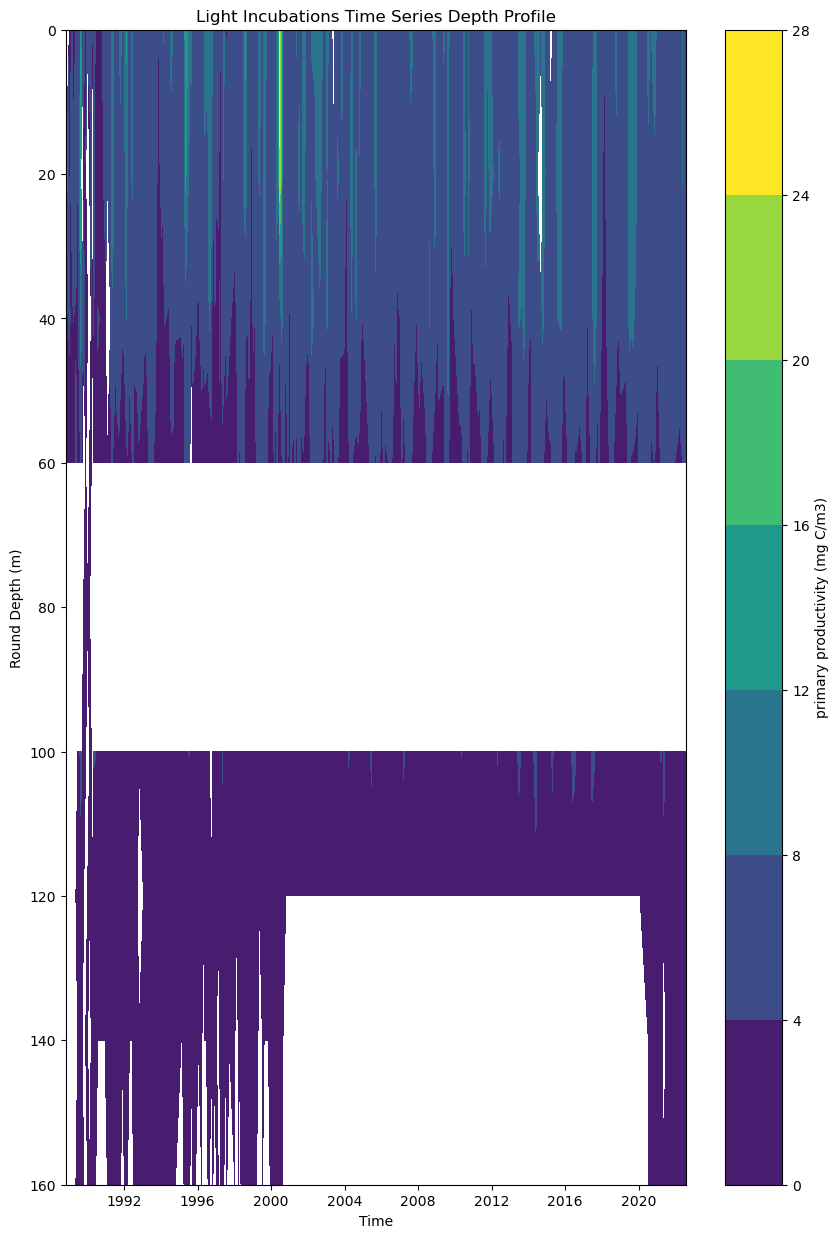

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# answer variables
indices = ['time', 'lat', 'lon', 'round_depth', 'cruise']

# Calculates the means of the good_light data
hot_df_grouped = good_light.groupby(indices).mean()
display(hot_df_grouped)

# Drops cruise column
hot_df_grouped = hot_df_grouped.droplevel('cruise')
display(hot_df_grouped)

# Convert the dateframe to xarray
hot_xr = hot_df_grouped.to_xarray()
display(hot_xr)
# Gets the mean of l12 across the lat and lon
light_ts = hot_xr['l12'].mean(dim=['lat', 'lon'])

# your code for plotting
fig = plt.figure(figsize=(10, 15))
ax = plt.gca()

# creates a contour map
cntr = plt.contourf(light_ts['time'], light_ts['round_depth'], light_ts.T, vmin=0, vmax = 26)
# adds the color bar
c = plt.colorbar(cntr, ax=ax)

# sets the label for color bar
c.set_label('primary productivity (mg C/m3)')

# Inverts the y axis
ax.invert_yaxis()
# Sets the x label
ax.set_xlabel("Time")
# Sets the y label
ax.set_ylabel("Round Depth (m)")
# Adds the title to the contour map
ax.set_title("Light Incubations Time Series Depth Profile")
         

1. From the graph, i see that the productivity is high near the surface and 
    decreases as we reach deeper depth. And overtime the productivity seems pretty consistent.
2. Yes, the pattern is the deeper the lower productivity.

In [7]:
grader.check("Question 1, Part 3")

Question 1, Part 3 results: All test cases passed!

## Part 4 (30 minutes)
Now, we will take a look at the data in different time resolutions. First, we will resample the data into monthly means. Next, we will take a yearly rolling average across the months. 

1) Set the index of `hot_df` to the "time" column and store the new dataframe as `hot_df_time`. 

2) Use the `resample()` function to take montly means across the "l12" column of `hot_df_time`. Store these resampled values in `light_resamp`. 

3) Take the yearly rolling average across `light_resamp`. Set the arguments: "center = True" and "min_periods = 6". These will ensure that your data is centered and smooths missing data values. _HINT_: How many months are in a year? Store your rolling averages in the `light_roll` variable. 

4) Create a figure of with your monthly resampled values and your yearly rolling averages. Plot these data as 2 different colors and give the markers. Include a legend, axis labels, and appropriate font sizes. 

5) Answer the following questions in a comment or markdown cell below your plot: 

>a) What do you notice about the overall productivity? Keep in mind that these includes all depths. 

>b) What kind of questions can you ask about the resampled monthly data? What about the rolling yearly averages? How do these results differ?

In [8]:
# answer variables
# Sets the time as the index
hot_df_time = hot_df.set_index('time')
# Gets the monthly means of hot_df_time
light_resamp = hot_df_time['l12'].resample('M').mean()
# Gets the mean of the years across light_resamp
light_roll = light_resamp.rolling(window = 12, center = True, min_periods=6).mean()

# your code for plotting

In [9]:
grader.check("Question 1, Part 4")

Question 1, Part 4 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Part 5 (20 minutes)
Finally, we will look at the seasonal changes of production at Station ALOHA. 

1) Create a new index named `months` by finding the months from `hot_df_time`. (_HINT_: Check this week's Lesson 15 prelecture demo on how to do this.)

2) Use `groupby()` on the `hot_df_time` "l12" column to find the means for each month. Store this variable in `month_means`. 

3) Following the same step in 2), calculate the standard errors (`sem()`) for each month. Store this variable in `month_sems`. 

4) Create a barplot of your monthly mean production. Include an error bar using the "yerr" argument. Include a legend, axis labels, and appropriate font sizes. (_HINT_: Review week 7 prelecture demo code from Lesson 11)

5) Answer the following questions in a comment or markdown cell below your plot: 

>a) What patterns in monthly productivity do you see? 

>b) What is the range in standard error? 

>c) What does this say about the variability in productivity month to month? year to year?

In [10]:
# answer variables
months = ""
month_means = ""
month_sems = ""

# code for plotting


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Optional (only attempt if you've finished the Parts 1-4 and still have time!)

In July of 2000, there was a peak in productivity and chlorophyll, signifying a phytoplankton bloom. Here, we will investigate this phenomenon in more detail. 

1) Subset your `hot_df_time` dataframe from "2000-01-01" to "2001-01-01". 

2) Follow the steps from part 3 to format and plot your subsetted data for the "l12 column. 

3) Create a similar plot for Chlorophyll. 

4) Answer the following questions: 

>a) What is the general relationship between chlorophyll and primary productivity?

>b) Do they always align? When? When do they not align?

>c) Why do you think so?

In [11]:
# your code 


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Reflection questions (5 minutes)
The purpose of the reflection is to inform us as instructors about students comfort level with course content. We use these answers to inform how we spend class time and design coursework in subsequent weeks. This question is graded for completeness, so please answer each question in the text box below. Be concise in your answers (max. 2 sentences). 

1) What do you feel you excelled at in this exercise? Why?

2) What did you struggle with most in the exercise? Why?

3) Is there any section of the question that you did not complete? If so, briefly describe why and the section you spent the most time on. 

4) Is there any topic you feel we need to revisit or review in class? Why?

1. I feel excelled at the first part and second part of the exercise
    because i feel more confident in selecting specific data and using different
    functions on them like sort, mean...
2. I struggled the most with plotting like contour map because i'm still not used to 
    the arguments of contour plot
3. Yes, section 4 and 5. It's because i spent too much time on the plotting.
4. Maybe contour map and using rolling

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [12]:
grader.check_all()

Question 1, Part 1 results: All test cases passed!

Question 1, Part 2 results: All test cases passed!

Question 1, Part 3 results: All test cases passed!

Question 1, Part 4 results: All test cases passed!